In [2]:
import pandas as pd


In [17]:
df = pd.read_csv('turistas_angola_padronizado.csv')
display(df)



,ano,mes,precipitacao,precipitacao_media_historica,temperatura_media,temperatura_media_historica,temp_maxima,temp_minima,temp_maxima_historica,temp_minima_historica,localidade,visitantes
0,2022,January,48.02,98.86,23.43,21.74,28.85,17.85,27.40,16.09,Lubango,926
1,2022,February,145.95,104.03,23.06,21.84,28.50,18.04,27.41,15.98,Lubango,310
2,2022,March,90.60,210.35,23.26,22.23,27.94,17.20,27.75,16.51,Lubango,665
3,2022,April,77.86,104.84,22.67,21.78,27.64,17.32,27.23,16.08,Lubango,764
4,2022,May,0.63,1.27,20.48,19.58,26.31,14.73,25.22,13.71,Lubango,610
...,...,...,...,...,...,...,...,...,...,...,...,...
102,2024,August,0.15,0.15,22.57,20.20,28.44,17.04,26.07,14.67,Benguela,2555
103,2024,September,0.79,0.79,23.59,21.72,28.99,17.79,27.47,16.16,Benguela,2748
104,2024,October,25.73,25.73,25.00,23.17,30.89,18.70,28.79,17.65,Benguela,2562
105,2024,November,44.95,44.95,25.00,24.15,30.93,19.15,29.72,18.51,Benguela,2628


In [8]:
# Ver colunas originais
print("Colunas originais:")
print(df.columns.tolist())

# Remover coluna 'Unnamed: 0' se existir
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

# Dicionário de renomeação para português
renomear_colunas = {
    "Year": "ano",
    "Month": "mes",
    "Precipitation": "precipitacao",
    "Precipitation_Historical_Average": "precipitacao_media_historica",
    "Average_Temperature": "temperatura_media",
    "Temperature_Historical_Average": "temperatura_media_historica",
    "Max_Temperature": "temp_maxima",
    "Min_Temperature": "temp_minima",
    "Temperature_Historical_Max": "temp_maxima_historica",
    "Temperature_Historical_Min": "temp_minima_historica",
    "localidade": "localidade",
    "visitantes": "visitantes"
}

# Aplicar renomeação
df.rename(columns=renomear_colunas, inplace=True)

# Colocar tudo em minúsculas e substituir espaços por "_"
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Mostrar resultado final
print("\nColunas padronizadas:")
print(df.columns.tolist())

# Salvar dataset limpo (opcional)
df.to_csv("turistas_angola_padronizado.csv", index=False)


Colunas originais:
['Year', 'Month', 'Precipitation', 'Precipitation_Historical_Average', 'Average_Temperature', 'Temperature_Historical_Average', 'Max_Temperature', 'Min_Temperature', 'Temperature_Historical_Max', 'Temperature_Historical_Min', 'localidade', 'visitantes']

Colunas padronizadas:
['ano', 'mes', 'precipitacao', 'precipitacao_media_historica', 'temperatura_media', 'temperatura_media_historica', 'temp_maxima', 'temp_minima', 'temp_maxima_historica', 'temp_minima_historica', 'localidade', 'visitantes']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ano                           107 non-null    int64  
 1   mes                           107 non-null    object 
 2   precipitacao                  107 non-null    float64
 3   precipitacao_media_historica  107 non-null    float64
 4   temperatura_media             107 non-null    float64
 5   temperatura_media_historica   107 non-null    float64
 6   temp_maxima                   96 non-null     float64
 7   temp_minima                   102 non-null    float64
 8   temp_maxima_historica         107 non-null    float64
 9   temp_minima_historica         107 non-null    float64
 10  localidade                    107 non-null    object 
 11  visitantes                    107 non-null    int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 10.2+ KB


**Tratamento de valores ausentes e inconsistências**


In [15]:
print("\nVerificação final (nenhum valor deve ser > 0):")
print(df.isna().sum())

Valores ausentes antes do tratamento:
ano                             0
mes                             0
precipitacao                    0
precipitacao_media_historica    0
temperatura_media               0
temperatura_media_historica     0
temp_maxima                     0
temp_minima                     0
temp_maxima_historica           0
temp_minima_historica           0
localidade                      0
visitantes                      0
dtype: int64


In [16]:
#Preencher valores ausentes por média do mesmo mês e localidade
df["temp_maxima"] = df.groupby(["localidade", "mes"])["temp_maxima"].transform(
    lambda x: x.fillna(x.mean())
)
df["temp_minima"] = df.groupby(["localidade", "mes"])["temp_minima"].transform(
    lambda x: x.fillna(x.mean())
)

print("\nVerificação final (nenhum valor deve ser > 0):")
print(df.isna().sum())
df.to_csv("turistas_angola_padronizado.csv", index=False)


Verificação final (nenhum valor deve ser > 0):
ano                             0
mes                             0
precipitacao                    0
precipitacao_media_historica    0
temperatura_media               0
temperatura_media_historica     0
temp_maxima                     0
temp_minima                     0
temp_maxima_historica           0
temp_minima_historica           0
localidade                      0
visitantes                      0
dtype: int64


                        ** Conversão e Harmonização de Tipos **

In [18]:
print("Tipos originais:")
print(df.dtypes)


Tipos originais:
ano                               int64
mes                              object
precipitacao                    float64
precipitacao_media_historica    float64
temperatura_media               float64
temperatura_media_historica     float64
temp_maxima                     float64
temp_minima                     float64
temp_maxima_historica           float64
temp_minima_historica           float64
localidade                       object
visitantes                        int64
dtype: object


In [20]:
mes_map = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12,
    "Janeiro": 1, "Fevereiro": 2, "Março": 3, "Abril": 4,
    "Maio": 5, "Junho": 6, "Julho": 7, "Agosto": 8,
    "Setembro": 9, "Outubro": 10, "Novembro": 11, "Dezembro": 12
}

# Substituir os nomes pelos números
df["mes"] = df["mes"].replace(mes_map)

# Converter colunas de ano e mês para inteiros
df["ano"] = pd.to_numeric(df["ano"], errors="coerce").astype("Int64")
df["mes"] = pd.to_numeric(df["mes"], errors="coerce").astype("Int64")

C:\Users\José\AppData\Local\Temp\ipykernel_10128\3127528329.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["mes"] = df["mes"].replace(mes_map)


In [21]:
# Garantir que colunas numéricas estejam no formato float
num_cols = [
    "precipitacao", "precipitacao_media_historica",
    "temperatura_media", "temperatura_media_historica",
    "temp_maxima", "temp_minima",
    "temp_maxima_historica", "temp_minima_historica",
    "visitantes"
]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")



In [22]:
# Converter 'localidade' para tipo categórico
df["localidade"] = df["localidade"].astype("category")

# Criar uma nova coluna de data combinando ano e mês
df["data"] = pd.to_datetime(df["ano"].astype(str) + "-" + df["mes"].astype(str) + "-01")

# Reordenar colunas para melhor visualização
df = df[[
    "data", "ano", "mes", "localidade",
    "precipitacao", "precipitacao_media_historica",
    "temperatura_media", "temperatura_media_historica",
    "temp_maxima", "temp_minima",
    "temp_maxima_historica", "temp_minima_historica",
    "visitantes"
]]

# 6️⃣ Verificar tipos após a harmonização
print("\nTipos de dados após a conversão:")
print(df.dtypes)


Tipos de dados após a conversão:
data                            datetime64[ns]
ano                                      Int64
mes                                      Int64
localidade                            category
precipitacao                           float64
precipitacao_media_historica           float64
temperatura_media                      float64
temperatura_media_historica            float64
temp_maxima                            float64
temp_minima                            float64
temp_maxima_historica                  float64
temp_minima_historica                  float64
visitantes                               int64
dtype: object


In [23]:
df.to_csv("turistas_angola_padronizado.csv", index=False)

** Feriados **

In [31]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv("turistas_angola_padronizado.csv")

# Garantir que 'mes' é numérico
df["mes"] = df["mes"].astype(int)

# Dicionário com os feriados por mês
feriados_dict = {
    1: "Ano Novo",
    2: "Início da Luta Armada",
    3: "Dia Internacional da Mulher",
    4: "Dia da Paz e Reconciliação Nacional",
    5: "Dia do Trabalhador",
    6: None,
    7: None,
    8: None,
    9: "Dia do Herói Nacional",
    10: None,
    11: "Independência Nacional",
    12: "Natal e da Família"
}

# Criar as colunas
df["feriado"] = df["mes"].apply(lambda m: "Sim" if feriados_dict[m] else "Não")
df["nome_feriado"] = df["mes"].apply(lambda m: feriados_dict[m] if feriados_dict[m] else "")

# Verificar resultado
print(df[["ano", "mes", "feriado", "nome_feriado"]].drop_duplicates().sort_values(["ano", "mes"]))


     ano  mes feriado                         nome_feriado
0   2022    1     Sim                             Ano Novo
1   2022    2     Sim                Início da Luta Armada
2   2022    3     Sim          Dia Internacional da Mulher
3   2022    4     Sim  Dia da Paz e Reconciliação Nacional
4   2022    5     Sim                   Dia do Trabalhador
5   2022    6     Não                                     
6   2022    7     Não                                     
7   2022    8     Não                                     
8   2022    9     Sim                Dia do Herói Nacional
9   2022   10     Não                                     
10  2022   11     Sim               Independência Nacional
11  2022   12     Sim                   Natal e da Família
12  2023    1     Sim                             Ano Novo
13  2023    2     Sim                Início da Luta Armada
14  2023    3     Sim          Dia Internacional da Mulher
15  2023    4     Sim  Dia da Paz e Reconciliação Nacion

In [33]:
# Salvar resultado final
df.to_csv("turistas_angola_padronizado.csv", index=False)

**Outlier**


Coluna: precipitacao
Média = 73.87, Desvio-padrão = 92.35
Faixa aceitável: [-203.18, 350.92]
Total de outliers encontrados: 0

Coluna: temperatura_media
Média = 23.59, Desvio-padrão = 2.61
Faixa aceitável: [15.75, 31.43]
Total de outliers encontrados: 0

Coluna: temp_maxima
Média = 29.63, Desvio-padrão = 2.42
Faixa aceitável: [22.36, 36.90]
Total de outliers encontrados: 0

Coluna: temp_minima
Média = 18.09, Desvio-padrão = 2.47
Faixa aceitável: [10.68, 25.50]
Total de outliers encontrados: 0


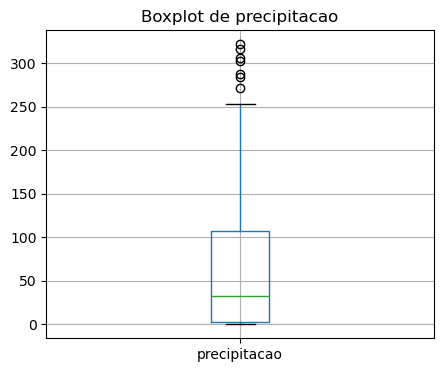

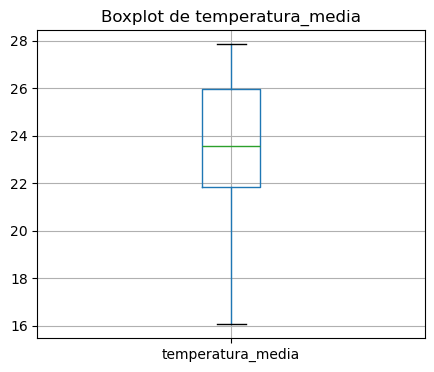

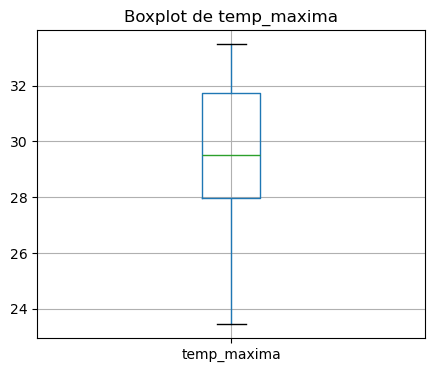

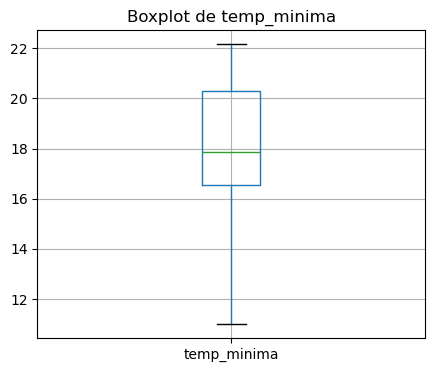


✅ Tratamento de outliers concluído. Arquivo salvo como 'tourists_angola_sem_outliers.csv'.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Selecionar colunas climáticas relevantes
colunas_clima = ["precipitacao", "temperatura_media", "temp_maxima", "temp_minima"]

#Detectar outliers usando método do desvio-padrão ---
for col in colunas_clima:
    media = df[col].mean()
    desvio = df[col].std()
    limite_inferior = media - 3 * desvio
    limite_superior = media + 3 * desvio
    
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    
    print(f"\nColuna: {col}")
    print(f"Média = {media:.2f}, Desvio-padrão = {desvio:.2f}")
    print(f"Faixa aceitável: [{limite_inferior:.2f}, {limite_superior:.2f}]")
    print(f"Total de outliers encontrados: {len(outliers)}")

#Visualizar outliers com boxplot ---
for col in colunas_clima:
    plt.figure(figsize=(5, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot de {col}")
    plt.show()

#Corrigir valores absurdos (ex.: precipitação negativa) ---
for col in ["precipitacao"]:
    erros = df[df[col] < 0]
    if not erros.empty:
        print(f"\nCorrigindo {len(erros)} valores negativos em '{col}'...")
        df.loc[df[col] < 0, col] = np.nan

#Substituir valores anômalos não climáticos por médias mensais e locais ---
for col in colunas_clima:
    limite_inferior = df[col].mean() - 3 * df[col].std()
    limite_superior = df[col].mean() + 3 * df[col].std()
    
    # Substituir outliers extremos por NaN
    df.loc[(df[col] < limite_inferior) | (df[col] > limite_superior), col] = np.nan

#Preencher novamente as lacunas com média mensal e localidade ---
df[colunas_clima] = df.groupby(["localidade", "mes"])[colunas_clima].transform(lambda x: x.fillna(x.mean()))

# Salvar dataset limpo
df.to_csv("tourists_angola_sem_outliers.csv", index=False)

print("\n Tratamento de outliers concluído. Arquivo salvo como 'tourists_angola_sem_outliers.csv'.")


**AED**

In [37]:
df.describe()

,ano,mes,precipitacao,precipitacao_media_historica,temperatura_media,temperatura_media_historica,temp_maxima,temp_minima,temp_maxima_historica,temp_minima_historica,visitantes
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2022.990654,6.448598,73.869907,43.251402,23.590280,22.660841,29.629626,18.088505,28.314206,16.998692,2134.654206
std,0.818366,3.442886,92.349591,51.336516,2.613353,2.594743,2.422161,2.470657,2.539184,2.551144,1510.823236
min,2022.000000,1.000000,0.030000,0.030000,16.070000,16.900000,23.440000,10.990000,22.620000,11.370000,310.000000
25%,2022.000000,3.500000,2.110000,0.765000,21.825000,20.740000,27.965000,16.540000,26.505000,15.135000,643.000000
50%,2023.000000,6.000000,32.250000,25.130000,23.560000,22.230000,29.520000,17.860000,27.920000,16.540000,2188.000000
75%,2024.000000,9.000000,107.575000,77.720000,25.945000,25.135000,31.725000,20.315000,30.745000,19.345000,2826.000000
max,2024.000000,12.000000,321.630000,210.350000,27.850000,26.590000,33.490000,22.170000,32.150000,20.880000,11279.000000


 Estatísticas descritivas gerais:
                              count         mean          std     min  \
precipitacao                  107.0    73.869907    92.349591    0.03   
precipitacao_media_historica  107.0    43.251402    51.336516    0.03   
temperatura_media             107.0    23.590280     2.613353   16.07   
temperatura_media_historica   107.0    22.660841     2.594743   16.90   
temp_maxima                   107.0    29.629626     2.422161   23.44   
temp_minima                   107.0    18.088505     2.470657   10.99   
temp_maxima_historica         107.0    28.314206     2.539184   22.62   
temp_minima_historica         107.0    16.998692     2.551144   11.37   
visitantes                    107.0  2134.654206  1510.823236  310.00   

                                  25%      50%       75%       max  
precipitacao                    2.110    32.25   107.575    321.63  
precipitacao_media_historica    0.765    25.13    77.720    210.35  
temperatura_media           

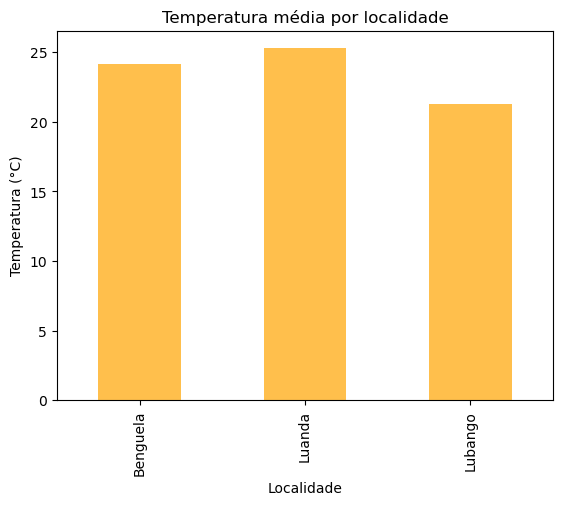

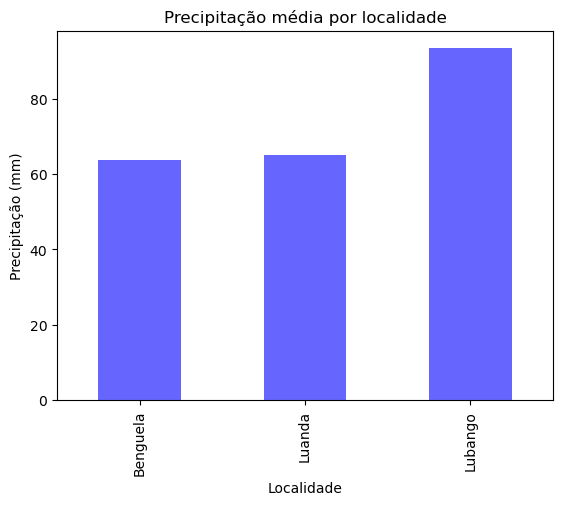

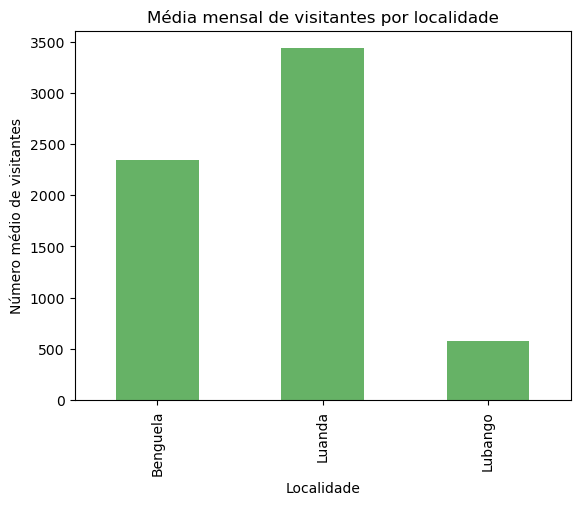

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas com base nos nomes renomeados
colunas_numericas = [
    'precipitacao',
    'precipitacao_media_historica',
    'temperatura_media',
    'temperatura_media_historica',
    'temp_maxima',
    'temp_minima',
    'temp_maxima_historica',
    'temp_minima_historica',
    'visitantes'
]

#Estatísticas descritivas gerais
estatisticas_gerais = df[colunas_numericas].describe().T
print(" Estatísticas descritivas gerais:")
print(estatisticas_gerais)

#Estatísticas descritivas por localidade
estatisticas_por_localidade = df.groupby('localidade')[colunas_numericas].agg(['mean', 'median', 'std', 'min', 'max'])
print("\n Estatísticas descritivas por localidade:")
print(estatisticas_por_localidade)

#Visualização da temperatura média por localidade
df.groupby('localidade')['temperatura_media'].mean().plot(kind='bar', color='orange', alpha=0.7)
plt.title('Temperatura média por localidade')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Localidade')
plt.show()

#Visualização opcional da precipitação média por localidade
df.groupby('localidade')['precipitacao'].mean().plot(kind='bar', color='blue', alpha=0.6)
plt.title('Precipitação média por localidade')
plt.ylabel('Precipitação (mm)')
plt.xlabel('Localidade')
plt.show()

#Visualização opcional de visitantes por localidade
df.groupby('localidade')['visitantes'].mean().plot(kind='bar', color='green', alpha=0.6)
plt.title('Média mensal de visitantes por localidade')
plt.ylabel('Número médio de visitantes')
plt.xlabel('Localidade')
plt.show()


**Engenharia de recursos**

In [39]:

#Criação da variável amplitude térmica ---
df['amplitude_termica'] = df['temp_maxima'] - df['temp_minima']

#Criação da variável anomalia de temperatura ---
df['anomalia_temperatura'] = df['temperatura_media'] - df['temperatura_media_historica']

#Criação da variável anomalia de precipitação ---
df['anomalia_precipitacao'] = df['precipitacao'] - df['precipitacao_media_historica']

#Criação da variável categórica "estacao" ---
def obter_estacao(mes):
    if mes in [9, 10, 11]:
        return 'Primavera'
    elif mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    else:
        return 'Inverno'

df['estacao'] = df['mes'].apply(obter_estacao)

#Criação da variável binária "periodo_alta_temporada" ---
# (Meses de férias e feriados prolongados)
df['periodo_alta_temporada'] = df['mes'].isin([12, 1, 7, 8]).astype(int)
df.head(10)

,data,ano,mes,localidade,precipitacao,precipitacao_media_historica,temperatura_media,temperatura_media_historica,temp_maxima,temp_minima,temp_maxima_historica,temp_minima_historica,visitantes,feriado,nome_feriado,amplitude_termica,anomalia_temperatura,anomalia_precipitacao,estacao,periodo_alta_temporada
0,2022-01-01,2022,1,Lubango,48.02,98.86,23.43,21.74,28.85,17.85,27.40,16.09,926,Sim,Ano Novo,11.00,1.69,-50.84,Verão,1
1,2022-02-01,2022,2,Lubango,145.95,104.03,23.06,21.84,28.50,18.04,27.41,15.98,310,Sim,Início da Luta Armada,10.46,1.22,41.92,Verão,0
2,2022-03-01,2022,3,Lubango,90.60,210.35,23.26,22.23,27.94,17.20,27.75,16.51,665,Sim,Dia Internacional da Mulher,10.74,1.03,-119.75,Outono,0
3,2022-04-01,2022,4,Lubango,77.86,104.84,22.67,21.78,27.64,17.32,27.23,16.08,764,Sim,Dia da Paz e Reconciliação Nacional,10.32,0.89,-26.98,Outono,0
4,2022-05-01,2022,5,Lubango,0.63,1.27,20.48,19.58,26.31,14.73,25.22,13.71,610,Sim,Dia do Trabalhador,11.58,0.90,-0.64,Outono,0
5,2022-06-01,2022,6,Lubango,0.28,0.55,19.20,17.08,23.69,14.13,22.79,11.48,420,Não,,9.56,2.12,-0.27,Inverno,0
6,2022-07-01,2022,7,Lubango,0.24,0.50,18.72,16.90,23.78,14.00,22.62,11.37,490,Não,,9.78,1.82,-0.26,Inverno,1
7,2022-08-01,2022,8,Lubango,0.18,0.04,19.66,18.58,25.99,13.48,24.43,13.04,467,Não,,12.51,1.08,0.14,Inverno,1
8,2022-09-01,2022,9,Lubango,3.58,3.04,22.42,20.81,27.32,16.69,26.55,15.24,586,Sim,Dia do Herói Nacional,10.63,1.61,0.54,Primavera,0
9,2022-10-01,2022,10,Lubango,44.98,60.33,23.56,21.81,29.26,17.86,27.43,16.29,480,Não,,11.40,1.75,-15.35,Primavera,0


**Transformação de Dados**

In [69]:
# Converter feriado em binário
if 'feriado' in df.columns:
    df['feriado'] = df['feriado'].map({'Sim': 1, 'Não': 0})

# Garantir que todas as variáveis categóricas estejam definidas
categoricas = ['localidade', 'estacao']

# Aplicar One-Hot Encoding com drop_first=True
df = pd.get_dummies(df, columns=categoricas, drop_first=True)

# Conferir resultado final
print("Colunas após recodificação:")
print(df.columns.tolist())


KeyError: "None of [Index(['localidade', 'estacao'], dtype='object')] are in the [columns]"

In [68]:
df = pd.get_dummies(df, columns=['localidade', 'estacao','feriado'])

KeyError: "None of [Index(['localidade', 'estacao', 'feriado'], dtype='object')] are in the [columns]"

**Escalonamento de variáveis numéricas**

In [41]:
from sklearn.preprocessing import StandardScaler

colunas_para_escalar = [
    'temperatura_media',
    'temp_maxima',
    'temp_minima',
    'precipitacao',
    'amplitude_termica',
    'anomalia_temperatura',
    'anomalia_precipitacao'
]

scaler = StandardScaler()
df[colunas_para_escalar] = scaler.fit_transform(df[colunas_para_escalar])


In [42]:
df.head(10)

,data,ano,mes,precipitacao,precipitacao_media_historica,temperatura_media,temperatura_media_historica,temp_maxima,temp_minima,temp_maxima_historica,...,nome_feriado,amplitude_termica,anomalia_temperatura,anomalia_precipitacao,periodo_alta_temporada,localidade_Luanda,localidade_Lubango,estacao_Outono,estacao_Primavera,estacao_Verão
0,2022-01-01,2022,1,-0.281231,98.86,-0.061620,21.74,-0.323387,-0.096989,27.40,...,Ano Novo,-0.690524,0.964382,-1.152600,1,False,True,False,False,True
1,2022-02-01,2022,2,0.784186,104.03,-0.203867,21.84,-0.468566,-0.019725,27.41,...,Início da Luta Armada,-1.379616,0.368428,0.159911,0,False,True,False,False,True
2,2022-03-01,2022,3,0.182013,210.35,-0.126977,22.23,-0.700853,-0.361315,27.75,...,Dia Internacional da Mulher,-1.022309,0.127510,-2.127644,0,False,True,True,False,False
3,2022-04-01,2022,4,0.043410,104.84,-0.353803,21.78,-0.825292,-0.312517,27.23,...,Dia da Paz e Reconciliação Nacional,-1.558270,-0.050009,-0.814992,0,False,True,True,False,False
4,2022-05-01,2022,5,-0.796804,1.27,-1.195750,19.58,-1.376972,-1.365754,25.22,...,Dia do Trabalhador,0.049613,-0.037329,-0.442293,0,False,True,True,False,False
5,2022-06-01,2022,6,-0.800612,0.55,-1.687847,17.08,-2.463742,-1.609747,22.79,...,,-2.528103,1.509617,-0.437058,0,False,True,False,False,False
6,2022-07-01,2022,7,-0.801047,0.50,-1.872384,16.90,-2.426410,-1.662612,22.62,...,,-2.247362,1.129221,-0.436916,1,False,True,False,False,False
7,2022-08-01,2022,8,-0.801700,0.04,-1.511000,18.58,-1.509707,-1.874073,24.43,...,,1.236383,0.190909,-0.431257,1,False,True,False,False,False
8,2022-09-01,2022,9,-0.764710,3.04,-0.449915,20.81,-0.958027,-0.568709,26.55,...,Dia do Herói Nacional,-1.162679,0.862943,-0.425597,0,False,True,False,True,False
9,2022-10-01,2022,10,-0.314304,60.33,-0.011641,21.81,-0.153320,-0.092923,27.43,...,,-0.180085,1.040462,-0.650433,0,False,True,False,True,False


In [43]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   data                          107 non-null    object 
 1   ano                           107 non-null    int64  
 2   mes                           107 non-null    int32  
 3   precipitacao                  107 non-null    float64
 4   precipitacao_media_historica  107 non-null    float64
 5   temperatura_media             107 non-null    float64
 6   temperatura_media_historica   107 non-null    float64
 7   temp_maxima                   107 non-null    float64
 8   temp_minima                   107 non-null    float64
 9   temp_maxima_historica         107 non-null    float64
 10  temp_minima_historica         107 non-null    float64
 11  visitantes                    107 non-null    int64  
 12  feriado                       107 non-null    object 
 13  nome_

Treinamento

In [44]:

#  Importar bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt


In [57]:

df.head()

,ano,mes,precipitacao,precipitacao_media_historica,temperatura_media,temperatura_media_historica,temp_maxima,temp_minima,temp_maxima_historica,temp_minima_historica,...,amplitude_termica,anomalia_temperatura,anomalia_precipitacao,periodo_alta_temporada,localidade_Luanda,localidade_Lubango,estacao_Outono,estacao_Primavera,estacao_Verão,dia
0,2022,1,-0.281231,98.86,-0.061620,21.74,-0.323387,-0.096989,27.40,16.09,...,-0.690524,0.964382,-1.152600,1,False,True,False,False,True,1
1,2022,2,0.784186,104.03,-0.203867,21.84,-0.468566,-0.019725,27.41,15.98,...,-1.379616,0.368428,0.159911,0,False,True,False,False,True,1
2,2022,3,0.182013,210.35,-0.126977,22.23,-0.700853,-0.361315,27.75,16.51,...,-1.022309,0.127510,-2.127644,0,False,True,True,False,False,1
3,2022,4,0.043410,104.84,-0.353803,21.78,-0.825292,-0.312517,27.23,16.08,...,-1.558270,-0.050009,-0.814992,0,False,True,True,False,False,1
4,2022,5,-0.796804,1.27,-1.195750,19.58,-1.376972,-1.365754,25.22,13.71,...,0.049613,-0.037329,-0.442293,0,False,True,True,False,False,1


In [61]:
if 'data' in df.columns:
    df = df.drop(columns=['data'])

# Separar variáveis explicativas e alvo

X = df.drop(columns=['visitantes'])
y = df['visitantes']


In [62]:

# ============================== Divisão em treino, validação e teste ======================

# Primeiro dividimos entre treino+validação e teste
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Depois dividimos o restante entre treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)
# Resultado: 60% treino, 20% validação, 20% teste

print(f"Tamanhos: Treino={len(X_train)}, Validação={len(X_val)}, Teste={len(X_test)}")

Tamanhos: Treino=63, Validação=22, Teste=22


In [67]:


# ============================== Inicialização e configuração do modelo ==============================
modelo = RandomForestRegressor(
    n_estimators=200,       # número de árvores na floresta
    max_depth=10,           # profundidade máxima de cada árvore
    min_samples_split=4,    # número mínimo de amostras para dividir um nó
    min_samples_leaf=2,     # número mínimo de amostras em uma folha
    random_state=42,
    n_jobs=-1               # usa todos os núcleos do processador
)

# ============================== Treinamento do modelo ==============================
modelo.fit(X_train, y_train)


ValueError: could not convert string to float: 'Sim'

In [ ]:

# ============================== Validação cruzada k-fold (k=5) ==============================
scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='r2')
print(f"R² médio (validação cruzada): {np.mean(scores):.3f}")
print(f"Desvio padrão dos folds: {np.std(scores):.3f}")

# ============================== Avaliação no conjunto de validação  ==============================
y_pred_val = modelo.predict(X_val)

r2_val = r2_score(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
rmse_val = sqrt(mean_squared_error(y_val, y_pred_val))

print("\nDesempenho no conjunto de validação:")
print(f"R² = {r2_val:.3f}")
print(f"MAE = {mae_val:.2f}")
print(f"RMSE = {rmse_val:.2f}")

In [ ]:


# ============================== Avaliação no conjunto de teste (final) ==============================
y_pred_test = modelo.predict(X_test)

r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))

print("\nDesempenho no conjunto de teste:")
print(f"R² = {r2_test:.3f}")
print(f"MAE = {mae_test:.2f}")
print(f"RMSE = {rmse_test:.2f}")

# ============================== Importância das variáveis ==============================
importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias = importancias.sort_values(ascending=False)

print("\nImportância das variáveis mais relevantes:")
print(importancias.head(10))
